In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [ ]:
df = pd.read_csv(r'/content/data_balita.csv')

In [ ]:
df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


In [ ]:
df.describe()

,Umur (bulan),Tinggi Badan (cm)
count,120999.000000,120999.000000
mean,30.173803,88.655434
std,17.575119,17.300997
min,0.000000,40.010437
25%,15.000000,77.000000
50%,30.000000,89.800000
75%,45.000000,101.200000
max,60.000000,128.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [ ]:
df.columns

Index(['Umur (bulan)', 'Jenis Kelamin', 'Tinggi Badan (cm)', 'Status Gizi'], dtype='object')

In [ ]:
df = df.rename(columns={
    'Umur (bulan)': 'Umur (bln)',
    'Tinggi Badan (cm)	': 'Tinggi Badan',
})

In [ ]:
df['Jenis Kelamin'] = df['Jenis Kelamin'].replace({
    'perempuan': 'Perempuan',
    'laki-laki': 'Laki-Laki'
})

df['Status Gizi'] = df['Status Gizi'].replace({
    'severely stunting': 'Stunting Parah',
    'stunting': 'Stunting',
    'normal': 'Pertumbuhan Baik',
    'tinggi': 'Pertumbuhan Sangat Baik'
})

In [ ]:
df.head()

,Umur (bln),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,Laki-Laki,44.591973,stunted
1,0,Laki-Laki,56.705203,Pertumbuhan Sangat Baik
2,0,Laki-Laki,46.863358,Pertumbuhan Baik
3,0,Laki-Laki,47.508026,Pertumbuhan Baik
4,0,Laki-Laki,42.743494,severely stunted


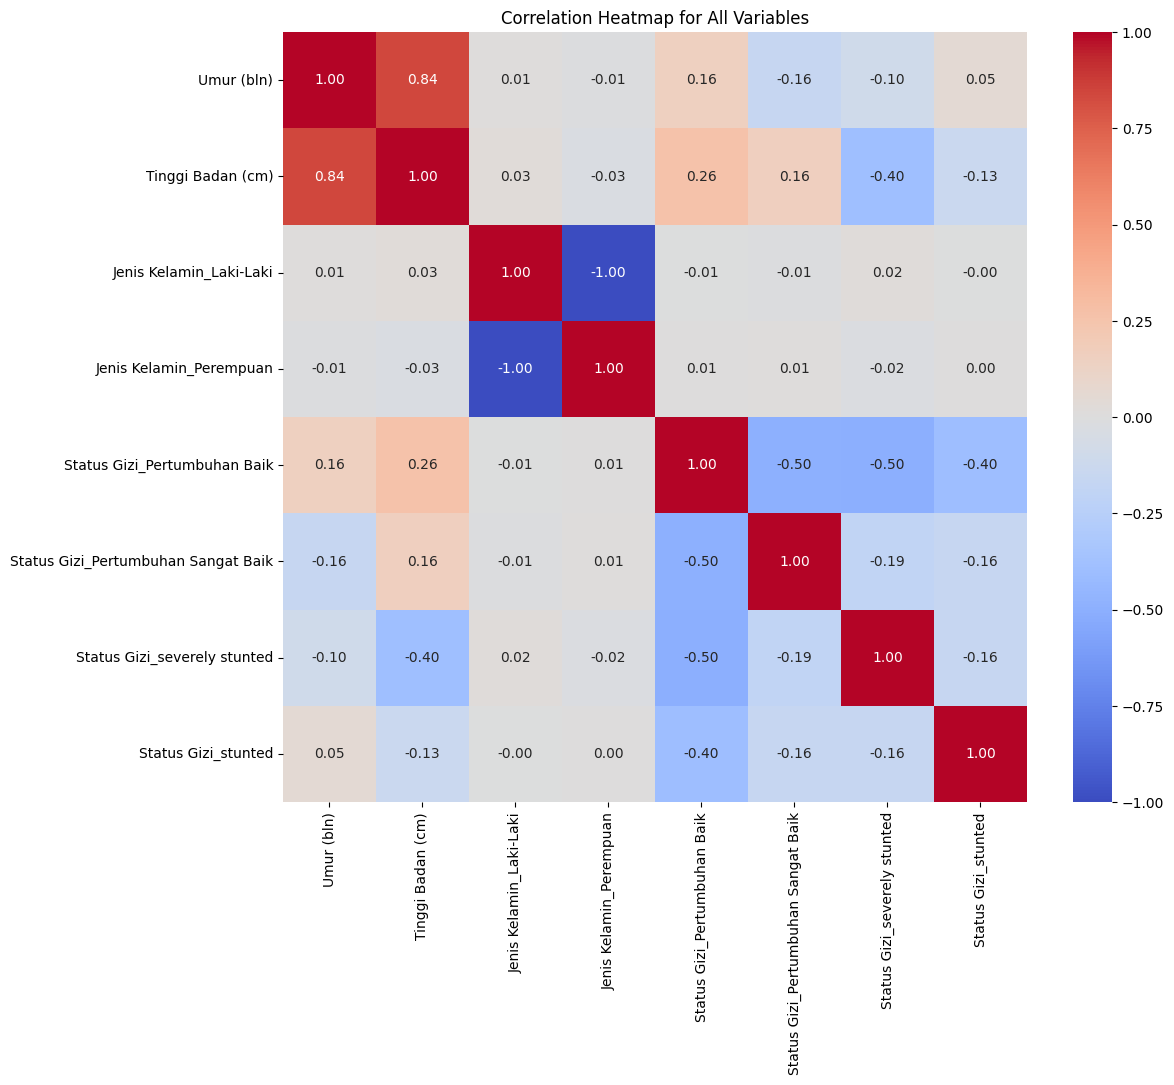

In [ ]:
df_numerical = df.select_dtypes(include=['int64', 'float64'])

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df.select_dtypes(include=['object']))

# Concatenate numerical and encoded categorical variables
df_combined = pd.concat([df_numerical, df_encoded], axis=1)

# Create a heatmap for all variables
correlation_matrix_combined = df_combined.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_combined, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for All Variables')
plt.show()

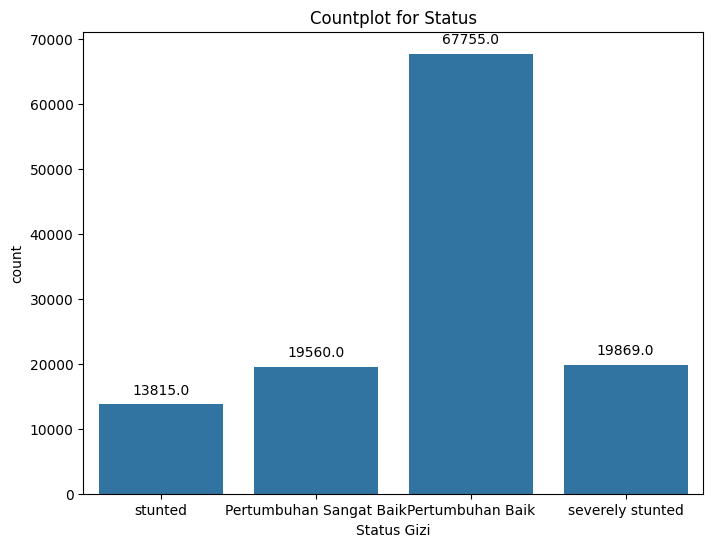

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Status Gizi', data=df)

# Add count annotations on the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Countplot for Status')
plt.show()

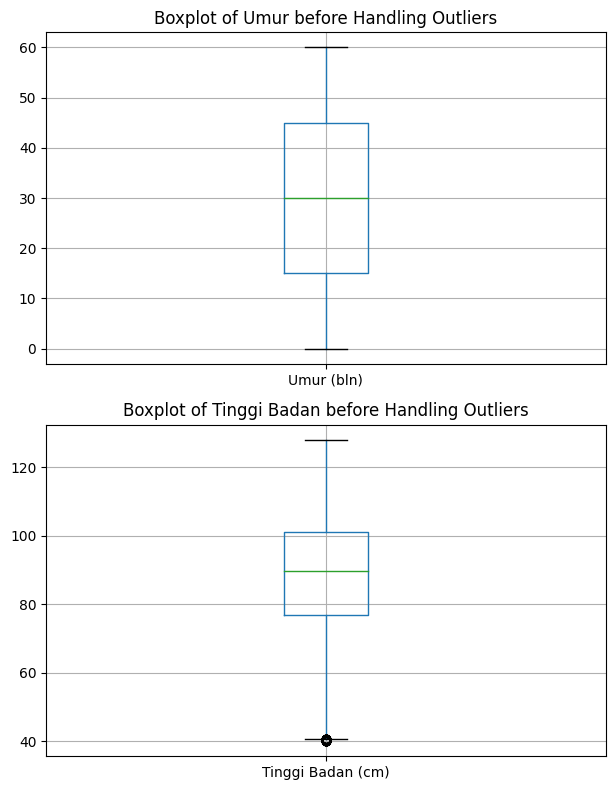

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
df.boxplot(column=['Umur (bln)'])
plt.title('Boxplot of Umur before Handling Outliers')

plt.subplot(2, 2, 3)
df.boxplot(column=['Tinggi Badan (cm)'])
plt.title('Boxplot of Tinggi Badan before Handling Outliers')

plt.tight_layout()
plt.show()

In [ ]:
category_counts = df['Status Gizi'].value_counts()
category_counts

Status Gizi
Pertumbuhan Baik           67755
severely stunted           19869
Pertumbuhan Sangat Baik    19560
stunted                    13815
Name: count, dtype: int64

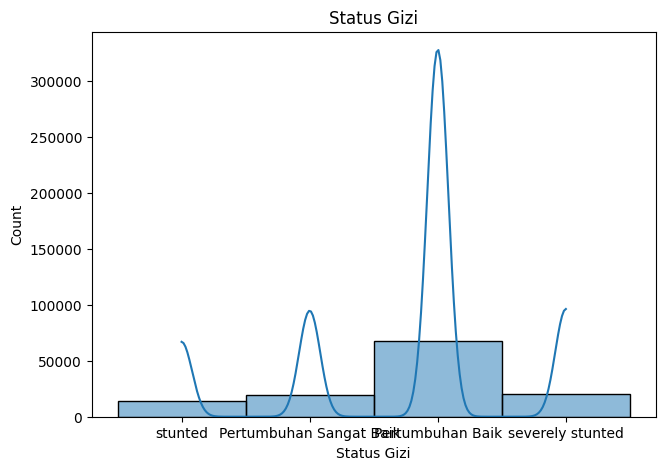

In [ ]:
# Check the distribution of "Observation_Value" with a distplot and boxplot using seaborn and matplotlib
plt.figure(figsize=(16, 5))

# Distribution plot
plt.subplot(121)
sns.histplot(df['Status Gizi'], kde=True)
plt.title('Status Gizi')


plt.show()

In [ ]:
# mengkodekan jenis kelamin
df['Jenis Kelamin'] = df['Jenis Kelamin'].map({'Laki-Laki': 0, 'Perempuan': 1})

# mengkodekan status gizi
df['Status Gizi'] = df['Status Gizi'].map({'severely stunted': 0, 'stunted': 1, 'normal': 2, 'tinggi': 3})
df

,Umur (bln),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,0,44.591973,1.0
1,0,0,56.705203,NaN
2,0,0,46.863358,NaN
3,0,0,47.508026,NaN
4,0,0,42.743494,0.0
...,...,...,...,...
120994,60,1,100.600000,NaN
120995,60,1,98.300000,1.0
120996,60,1,121.300000,NaN
120997,60,1,112.200000,NaN


In [ ]:
from sklearn.model_selection import train_test_split

# memisahkan fitur dan target
X = df.iloc[:, 1:6]
X = df.drop('Status Gizi', axis=1)
y = df['Status Gizi']

# membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(X_train.shape[1],), activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Melatih model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
3025/3025 [==============================] - 9s 3ms/step - loss: -180867.2500 - accuracy: 0.1151 - val_loss: -639754.6875 - val_accuracy: 0.1233
Epoch 2/100
3025/3025 [==============================] - 7s 2ms/step - loss: -1931216.7500 - accuracy: 0.1299 - val_loss: -3612862.2500 - val_accuracy: 0.1406
Epoch 3/100
3025/3025 [==============================] - 8s 3ms/step - loss: -6704753.0000 - accuracy: 0.1325 - val_loss: -10197589.0000 - val_accuracy: 0.1318
Epoch 4/100
3025/3025 [==============================] - 8s 3ms/step - loss: -15796550.0000 - accuracy: 0.1276 - val_loss: -21525006.0000 - val_accuracy: 0.1286
Epoch 5/100
3025/3025 [==============================] - 7s 2ms/step - loss: -30245796.0000 - accuracy: 0.1279 - val_loss: -38591960.0000 - val_accuracy: 0.1250
Epoch 6/100
3025/3025 [==============================] - 8s 3ms/step - loss: -51206044.0000 - accuracy: 0.1273 - val_loss: -62509688.0000 - val_accuracy: 0.1266
Epoch 7/100
3025/3025 [==================

In [ ]:
# Mengevaluasi model
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Train Loss: {train_loss}, Train Accuracy: {train_accuracy}')
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

757/757 [==============================] - 1s 1ms/step - loss: -183794532352.0000 - accuracy: 0.1206
Train Loss: -188342976512.0, Train Accuracy: 0.11878222227096558
Test Loss: -183794532352.0, Test Accuracy: 0.12057851254940033


In [ ]:
# Prediksi dengan data test
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Konversi prediksi probabilitas menjadi kelas biner

print('Predictions:', y_pred.flatten())

757/757 [==============================] - 1s 1ms/step
Predictions: [1 1 1 ... 1 1 1]


In [ ]:
# Menampilkan hasil prediksi dan nilai aktual
for actual, predicted in zip(y_test, y_pred):
    print(f'Actual: {actual}, Predicted: {predicted[0]}')

Streaming output truncated to the last 5000 lines.
Actual: 3, Predicted: 1
Actual: 0, Predicted: 0
Actual: 3, Predicted: 1
Actual: 2, Predicted: 1
Actual: 0, Predicted: 1
Actual: 3, Predicted: 1
Actual: 2, Predicted: 1
Actual: 2, Predicted: 1
Actual: 2, Predicted: 1
Actual: 2, Predicted: 1
Actual: 2, Predicted: 1
Actual: 2, Predicted: 1
Actual: 3, Predicted: 1
Actual: 1, Predicted: 1
Actual: 2, Predicted: 1
Actual: 2, Predicted: 1
Actual: 2, Predicted: 1
Actual: 3, Predicted: 1
Actual: 2, Predicted: 1
Actual: 2, Predicted: 1
Actual: 3, Predicted: 1
Actual: 2, Predicted: 1
Actual: 2, Predicted: 1
Actual: 1, Predicted: 1
Actual: 2, Predicted: 0
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 2, Predicted: 1
Actual: 2, Predicted: 1
Actual: 0, Predicted: 1
Actual: 2, Predicted: 1
Actual: 2, Predicted: 1
Actual: 0, Predicted: 1
Actual: 2, Predicted: 1
Actual: 0, Predicted: 1
Actual: 2, Predicted: 1
Actual: 0, Predicted: 1
Actual: 2, Pr

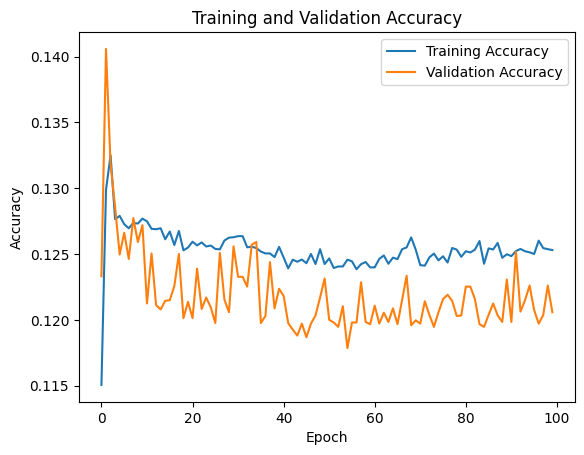

In [ ]:
# Plot akurasi selama pelatihan dan validasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

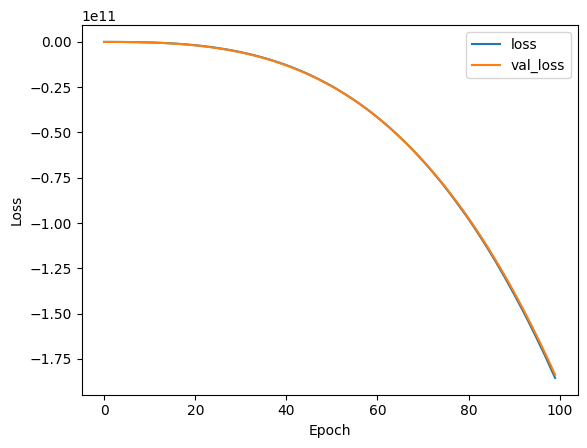

In [ ]:
# Plot akurasi selama loss dan val los
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()